In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-ml-salaries/salaries.csv


# Import Data

In [2]:
data = pd.read_csv("/kaggle/input/ai-ml-salaries/salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [4]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,18056.000000,1.805600e+04,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471
std,0.715810,3.265629e+05,68728.941915,45.828340
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103500.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,188500.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [5]:
data.shape

(18056, 11)

In [6]:
print(data['job_title'].nunique())

143


In [7]:
print(data.value_counts('job_title'))

job_title
Data Scientist                     4284
Data Engineer                      3724
Data Analyst                       2604
Machine Learning Engineer          2030
Research Scientist                  715
                                   ... 
Marketing Data Scientist              1
Marketing Data Engineer               1
CRM Data Analyst                      1
Cloud Data Architect                  1
Staff Machine Learning Engineer       1
Name: count, Length: 143, dtype: int64


In [8]:
job_categories = ['data_scientist','data_analyst','data_engineer','ml_engineer','manager','consultant']

data_scientist = "Data Scientist|NLP|Research Scientist|Applied Scientist"
data_analyst = "Analyst|Analytics|Data Specialist|Data Visualization Specialist|Business Intelligence|Data Strategist"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure|Business Intelligence Engineer|BI Developer|Business Intelligence Developer"
ml_engineer = "Machine Learning|ML|Big Data|AI|Research Engineer|Prompt Engineer|Robotics Engineer|Computer Vision Engineer|Robotics Software Engineer"
manager = "Manager|Head|Director|Lead|Principal|Staff|Data Product Owner|Data Management Specialist"
consultant = "Consultant|Freelance"

conditions = [
    (data["job_title"].str.contains(data_scientist)),
    (data["job_title"].str.contains(data_analyst)),
    (data["job_title"].str.contains(data_engineer)),
    (data["job_title"].str.contains(ml_engineer)),
    (data["job_title"].str.contains(manager)),
    (data["job_title"].str.contains(consultant)),
]

data["job_category"] = np.select(conditions,
                                job_categories,
                                default = "Other")

data[['job_title','job_category']].head()

,job_title,job_category
0,Analytics Engineer,data_analyst
1,AI Developer,ml_engineer
2,AI Developer,ml_engineer
3,Data Scientist,data_scientist
4,Data Scientist,data_scientist


In [9]:
print(data.value_counts('job_category'))
print(data.value_counts('employment_type'))

job_category
data_scientist    5552
data_engineer     4464
data_analyst      4370
ml_engineer       2989
manager            407
Other              272
consultant           2
Name: count, dtype: int64
employment_type
FT    17974
PT       38
CT       30
FL       14
Name: count, dtype: int64


In [10]:
data[data['job_category']=='Other'].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
1129,2024,MI,FT,Data Modeler,114000,USD,114000,CA,0,CA,M,Other
1130,2024,MI,FT,Data Modeler,69000,USD,69000,CA,0,CA,M,Other
1373,2024,SE,FT,Data Integration Engineer,256500,USD,256500,US,0,US,M,Other
1374,2024,SE,FT,Data Integration Engineer,170700,USD,170700,US,0,US,M,Other
1582,2024,SE,FT,Data Modeler,140000,USD,140000,US,100,US,M,Other


In [11]:
#data[~data['employment_type'].isin(['FT','PT','CT'])].head()

In [12]:
data = data[(data['job_category']!='consultant') & (data['employment_type'] == 'FT')]
print(data.value_counts('job_category'))

job_category
data_scientist    5521
data_engineer     4455
data_analyst      4348
ml_engineer       2972
manager            406
Other              270
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'data_scientist'),
  Text(1, 0, 'data_engineer'),
  Text(2, 0, 'data_analyst'),
  Text(3, 0, 'ml_engineer'),
  Text(4, 0, 'manager'),
  Text(5, 0, 'Other')])

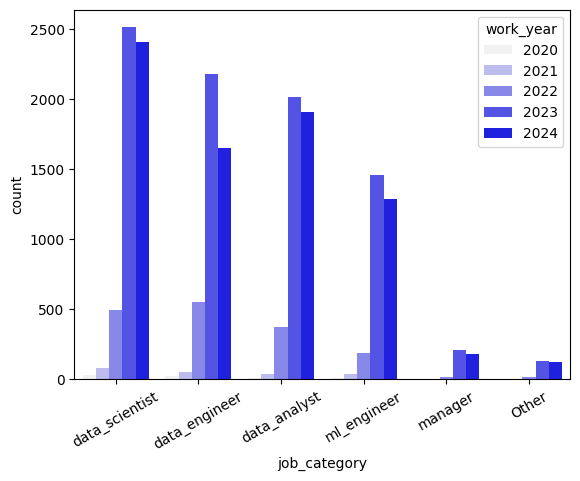

In [13]:
sns.countplot(data=data, x='job_category', order=data['job_category'].value_counts().index, color = 'blue', hue = 'work_year')
plt.xticks(rotation=30)

company_size
M    16723
L     1076
S      173
Name: count, dtype: int64


<Axes: xlabel='company_size', ylabel='count'>

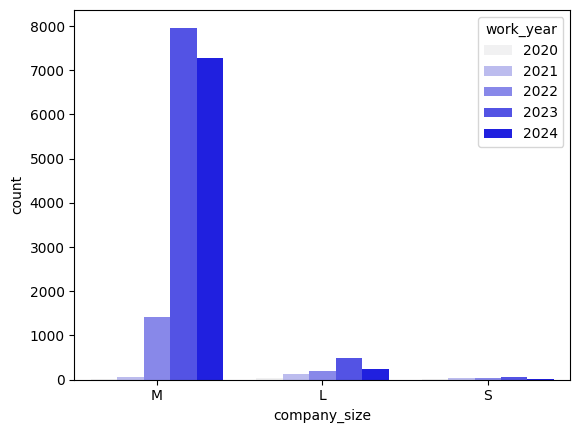

In [14]:
print(data.value_counts('company_size'))
sns.countplot(data=data, x='company_size', order=data['company_size'].value_counts().index, color = 'blue', hue = 'work_year')

company_size: The average number of people that worked for the company during the year.

S: less than 50 employees

M: 50 to 250 employees

L: more than 250 employees

remote_ratio
0      12320
100     5416
50       236
Name: count, dtype: int64


<Axes: xlabel='remote_ratio', ylabel='count'>

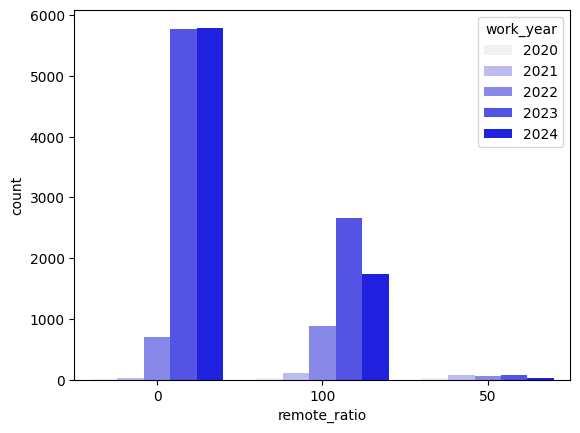

In [15]:
print(data.value_counts('remote_ratio'))
sns.countplot(data=data, x='remote_ratio', order=data['remote_ratio'].value_counts().index, color = 'blue', hue = 'work_year')

experience_level
SE    11468
MI     4557
EN     1425
EX      522
Name: count, dtype: int64


<Axes: xlabel='experience_level', ylabel='count'>

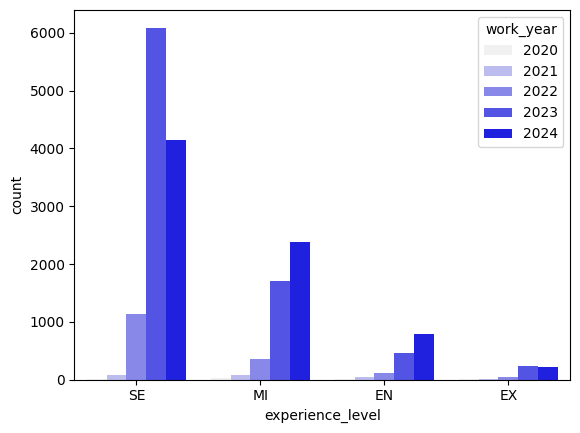

In [16]:
print(data.value_counts('experience_level'))
sns.countplot(data=data, x='experience_level', order=data['experience_level'].value_counts().index, color = 'blue', hue = 'work_year')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'data_analyst'),
  Text(1, 0, 'ml_engineer'),
  Text(2, 0, 'data_scientist'),
  Text(3, 0, 'data_engineer'),
  Text(4, 0, 'manager'),
  Text(5, 0, 'Other')])

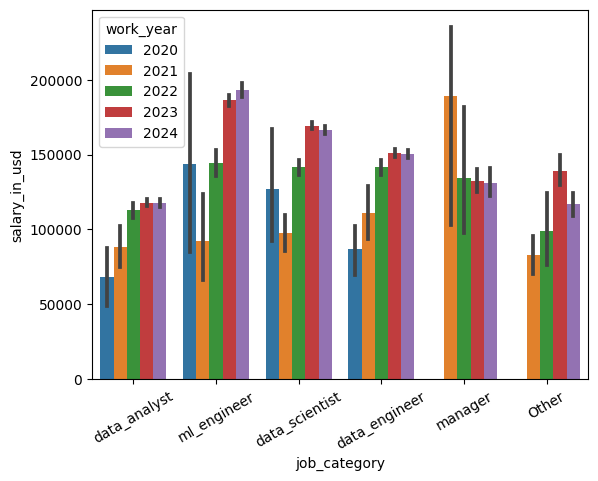

In [17]:
sns.barplot(data=data, x = 'job_category' ,y='salary_in_usd', hue = 'work_year')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'data_analyst'),
  Text(1, 0, 'data_engineer'),
  Text(2, 0, 'data_scientist'),
  Text(3, 0, 'ml_engineer'),
  Text(4, 0, 'manager'),
  Text(5, 0, 'Other')])

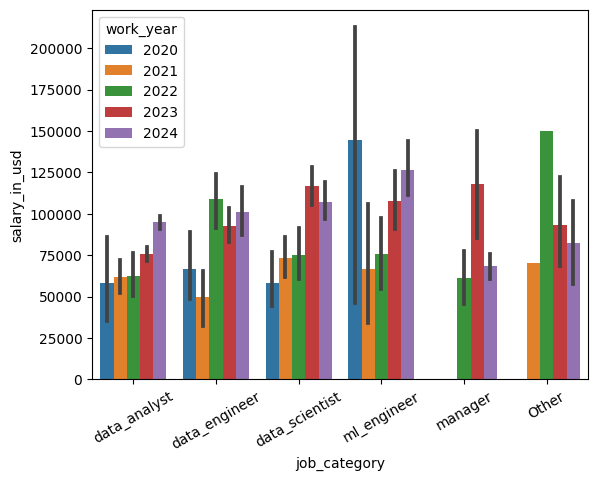

In [18]:
sns.barplot(data=data[data['experience_level']=='EN'], x = 'job_category' ,y='salary_in_usd', hue = 'work_year')
plt.xticks(rotation=30)